# Housing Prices Prediction Model

## 1. Defining the Question

### a) Specifying the Question

To develop a model that can predict the sale of prices for the Hass Consulting Company

### b) Defining the Metric for Success

### c) Understanding the context

### d). Recording the Experimental Design

We will use exploratory data analysis, such as Univariate, Bivariate, and Multivariate Analysis, in this study to determine the relationships and differences between different variables. We'll also use Multiple Linear Regression, Quantile Regression, Ridge Regression, Lasso Regression and Elastic Net Regression to make predictions.

### e) Data Relevance


The dataset to use for this project can be found by following this link: http://bit.ly/IndependentProjectWeek7Dataset

Below is the dataset glossary:

* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house

## 2. Reading the Data

In [59]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


In [3]:
# Let's read our dataset

house = pd.read_csv(r"C:\Users\HP\Desktop\Moringa_School_Projects\CORE\WK7_IP\Independent Project Week 7 - house_data.csv")

## 3. Checking the Data

In [4]:
# Checking the top data

house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Checking the columns

house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Checking the shape

house.shape

(21613, 20)

The dataset contains 20 columns and 21613 rows.

In [7]:
# Describing the data

house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 4. Tidying the Dataset

### a). Checking for Null Values

In [9]:
total = house.isnull().sum().sort_values(ascending=False)
percentage = (house.isnull().sum()/house.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
id,0,0.0
price,0,0.0
sqft_living15,0,0.0
long,0,0.0
lat,0,0.0
zipcode,0,0.0
yr_renovated,0,0.0
yr_built,0,0.0
sqft_basement,0,0.0
sqft_above,0,0.0


From the above, the dataset does not contain any outliers

### b). Checking for Duplicates

In [13]:
house.duplicated().sum()

3

There are 3 duplicates in the dataset and we shall proceed to remove them

In [14]:
house.drop_duplicates(keep='first',inplace=True)

In [15]:
# Confirming
house.duplicated().sum()

0

### c). Checking the Datatypes

In [18]:
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### d). Checking for Outliers

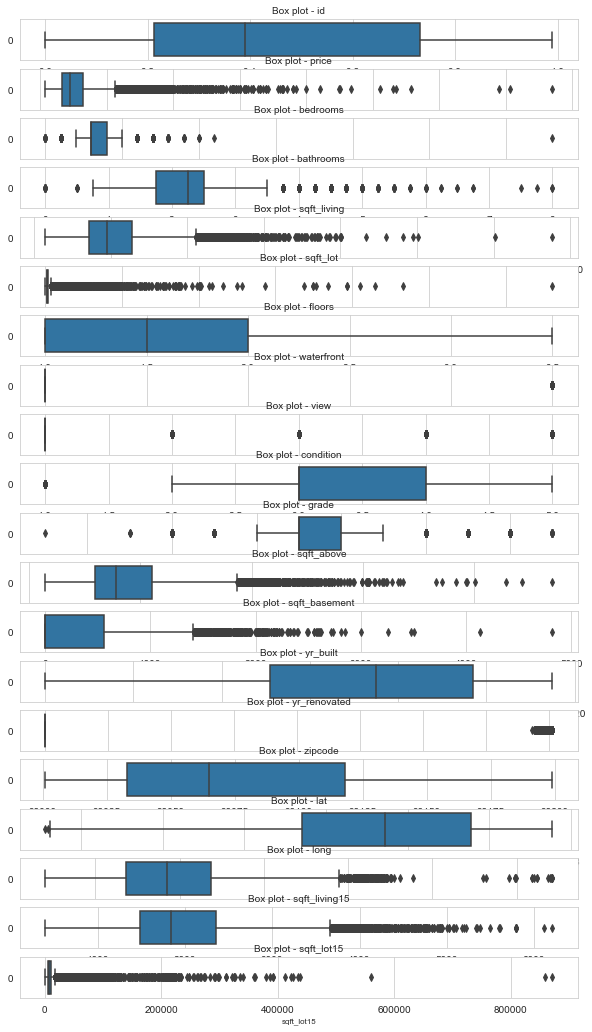

In [50]:
# Plotting columns with numerical values only to check for outliers
col_names = house.columns

fig, ax = plt.subplots(len(col_names), figsize= (10,18))

for i, col_val in enumerate(col_names):
  sns.boxplot(data = house[col_val], ax= ax[i], orient="h")
  house[col_val].value_counts()
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [51]:
# Removing outliers using IQR method
# ---
# Define the outliers range 
Q3 = house[col_names].quantile(0.75)
Q1 = house[col_names].quantile(0.25)
IQR = Q3 - Q1

# Determine the outliers
outliers = house[col_names][((house[col_names] < (Q1 - 1.5 * IQR))
 |(house[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(house))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (6675, 20). Which translates to 30.888477556686716% of the data.


## 5. Exploratory Analysis

### a) Univariate Analysis

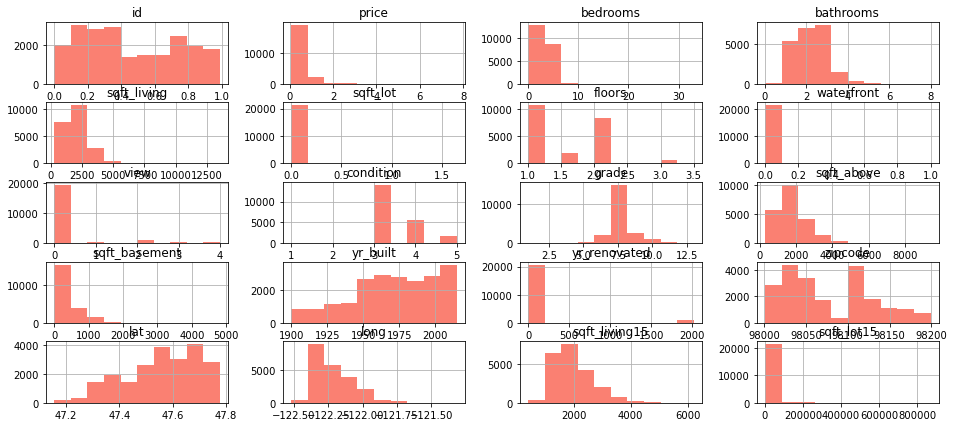

In [21]:
#Plots for data distribution

house.hist(bins=10, figsize=[16,7], color = 'salmon')
plt.show()

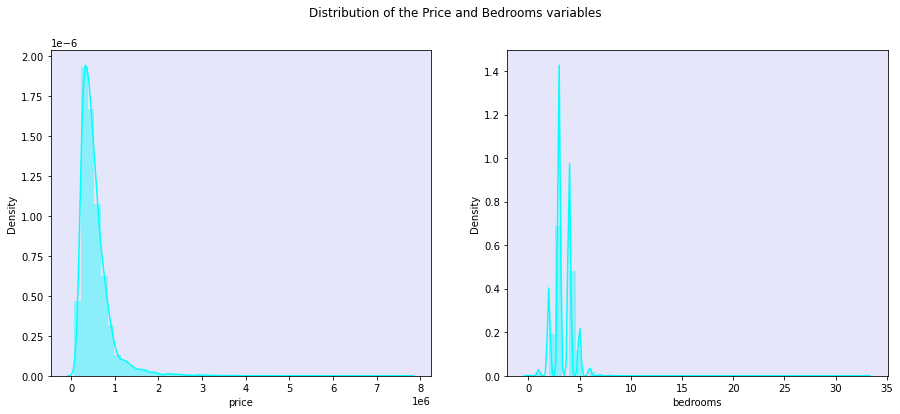

In [28]:
# Using displots to plot distribution of each variable
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
plt.suptitle('Distribution of the Price and Bedrooms variables')
for ax, data, column, color in zip(axes.flatten(), house, ['price', 'bedrooms'], ['cyan', 'aqua']):
  sns.distplot(house[column], ax = ax, hist = True, color = color)
  ax.set_facecolor('lavender')

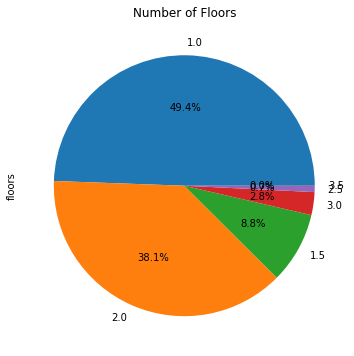

In [32]:
# Pie chart to show the number floors 

house.floors.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (6, 6))
plt.title('Number of Floors')
plt.show()

From the piechart above, we can tell that 1 floor is the most common type

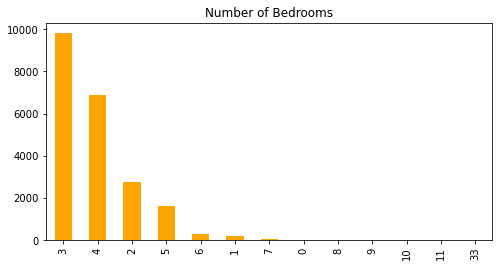

In [36]:
# Bar chart to show the number of bedrooms 

house.bedrooms.value_counts().plot(kind = 'bar', figsize = (8,4), color = 'orange')
plt.title('Number of Bedrooms')
plt.show()

From the above, we can easily see the 3 bedrooms are the most common

### b). Bivariate Analysis

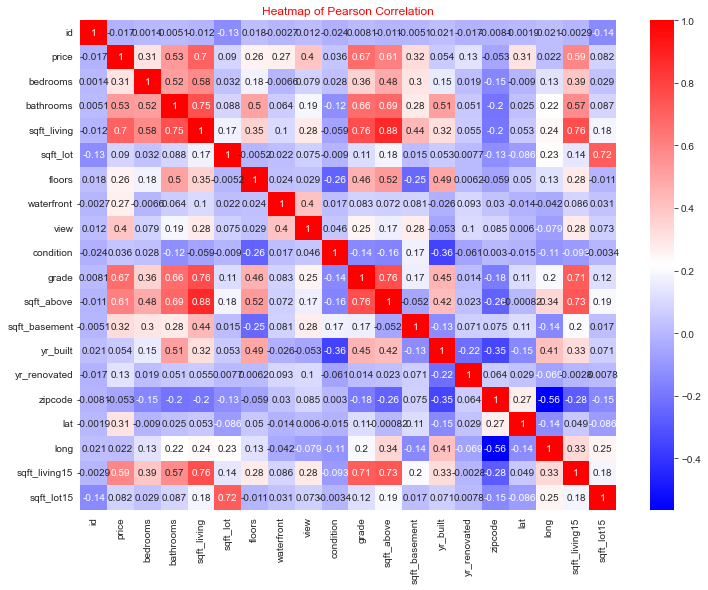

In [43]:
# Checking the Pearson's correlation

sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(house.corr(),annot=True,cmap='bwr')
plt.title('Heatmap of Pearson Correlation', color='red')
plt.show()

From the above heatmap, we can note that there is a strong positive correlation between sqft_living(Square feet area of living area) and price

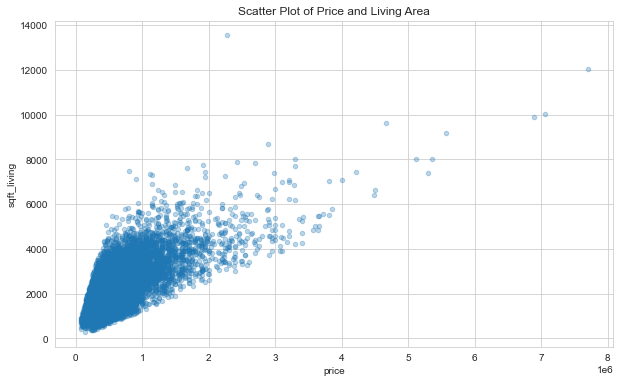

In [46]:
# Scatter plot for the squarefeet area of living area and price

house.plot(kind='scatter', x='price', y='sqft_living', alpha=0.3, figsize=(10,6))
plt.title('Scatter Plot of Price and Living Area')
plt.show()

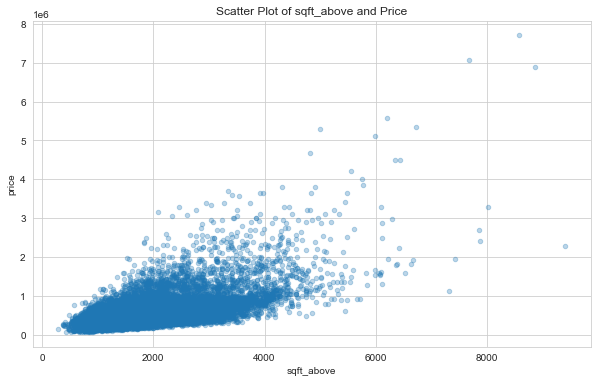

In [48]:
# Scatter plot for the sqft_above and price

house.plot(kind='scatter', x='sqft_above', y='price', alpha=0.3, figsize=(10,6))
plt.title('Scatter Plot of sqft_above and Price')
plt.show()

### c). Multivariate Analysis

#### Principal Component Analysis

In [52]:
# Preparing the data for the model

X = house.drop(['price'],axis=1)
y = house['price']

In [54]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
#  Normalization

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
# Applying the PCA with 2 components

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [58]:
# Explaining the Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.27516584, 0.11604468])

It can be seen that first principal component is responsible for 27.51% variance

In [61]:
# Using a multiple linear regression model

regressor = LinearRegression()

y_pred = regressor.fit(X_train, y_train)


In [63]:
# Evaluating the model

print('R-squared: %.2f' % regressor.score(X_test, y_test))

R-squared: 0.59
